### The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

##### Attribution Descriptions
##### TV - Spend on TV Advertisements
##### Radio - Spend on radio Advertisements
##### Newspaper - Spend on newspaper Advertisements
##### Sales - Sales revenue generated
##### Note: The amounts are in different units

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
advt=pd.read_csv("Advertising.csv")

In [3]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
advt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
advt=advt[['TV','Radio','Newspaper','Sales']]

In [6]:
import pandas_profiling as pf
pf.ProfileReport(advt)

Number of variables,4
Number of observations,200
Total Missing (%),0.0%
Total size in memory,6.3 KiB
Average record size in memory,32.4 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.min(),x.max(),x.mean(),x.median(),x.std(),
                      x.var(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
                      x.quantile(0.90),x.quantile(0.95),x.quantile(0.99)],
                    index=['N','NMISS','SUM','MIN','MAX','MEAN','MEDIAN','STD','VAR','P1','P5','P10',
                           'P25','P50','P75','P90','P95','P99'])


In [8]:
advt.apply(lambda x:var_summary(x)).T

,N,NMISS,SUM,MIN,MAX,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99
TV,200.0,0.0,29408.5,0.7,296.4,147.0425,149.75,85.854236,7370.949893,5.387,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.907
Radio,200.0,0.0,4652.8,0.0,49.6,23.2640,22.90,14.846809,220.427743,0.399,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.400
Newspaper,200.0,0.0,6110.8,0.3,114.0,30.5540,25.75,21.778621,474.308326,0.999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.515
Sales,200.0,0.0,2804.5,1.6,27.0,14.0225,12.90,5.217457,27.221853,4.784,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.507


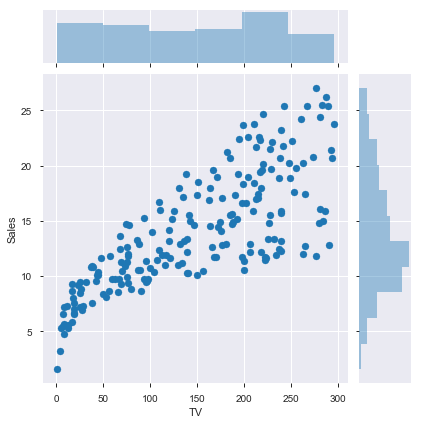

In [10]:
sns.jointplot(  advt.TV, advt.Sales )

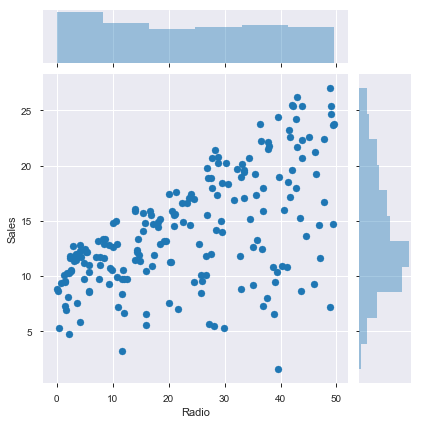

In [11]:
sns.jointplot(  advt.Radio, advt.Sales )

In [ ]:
# Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.

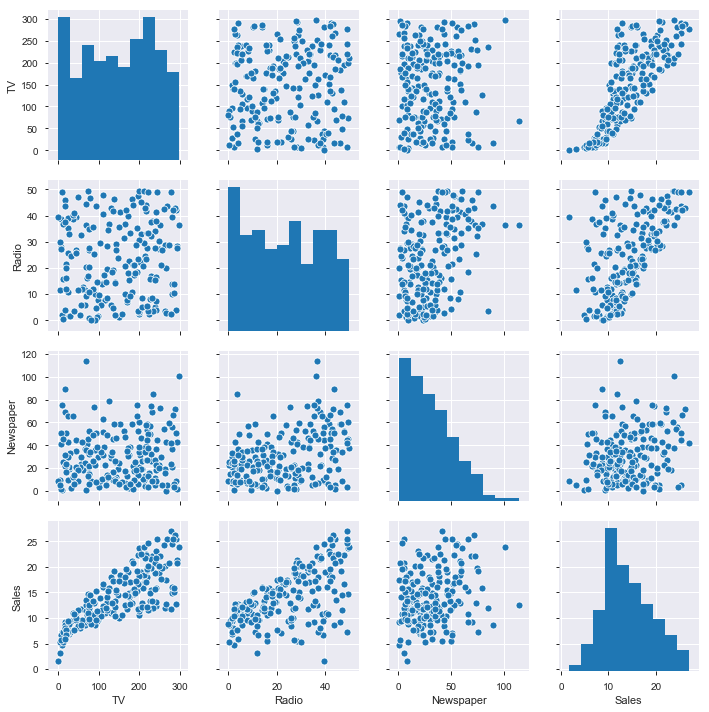

In [13]:
sns.pairplot(advt)

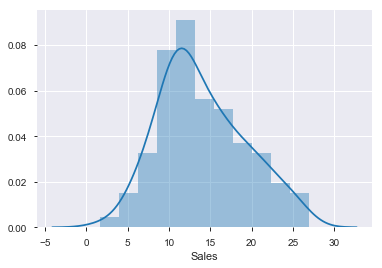

In [14]:
sns.distplot(advt.Sales)

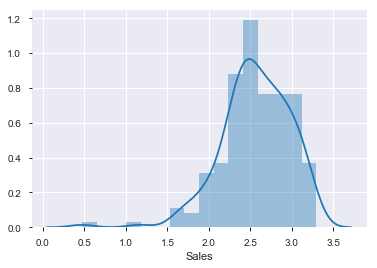

In [15]:
sns.distplot(np.log(advt.Sales))

In [16]:
#Calculating correlations
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


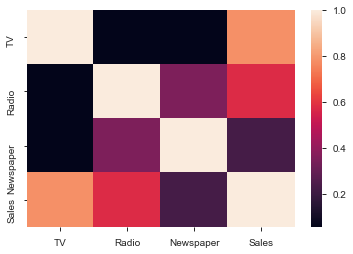

In [17]:
#Visualizing the correlations using a heat map
sns.heatmap(advt.corr())

In [ ]:
#correlation betweeb TV and Sales is highest i.e. 0.78 and then betweeb sales and radio i.e. 0.576.
#correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation.

In [18]:
#Outlier Treatment
advt['Sales']=advt.Sales.clip(lower=advt.Sales.quantile(0.01),upper=advt.Sales.quantile(0.99))

In [19]:
#Missing Value Treatment
advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())

In [20]:
#Model Building
import statsmodels.formula.api as smf

In [21]:
lm=smf.ols('Sales~TV+Radio+Newspaper',advt).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     623.9
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          5.61e-100
Time:                        13:26:03   Log-Likelihood:                -375.20
No. Observations:                 200   AIC:                             758.4
Df Residuals:                     196   BIC:                             771.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0831      0.295     10.443      0.000       2.501       3.665
TV             0.0451      0.001     34.166      0.000       0.043       0.048
Radio          0.1892      0.008     23.208      0.000       0.173       0.205
Newspaper     -0.0027      0.006     -0.483      0.630      -0.014       0.008
==============================================================================
Omnibus:                       29.918   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.490
Skew:                          -0.980   Prob(JB):                     4.39e-09
Kurtosis:                       3.884   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm=smf.ols('Sales~TV+Radio',advt).fit()

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     939.5
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.82e-101
Time:                        13:31:23   Log-Likelihood:                -375.32
No. Observations:                 200   AIC:                             756.6
Df Residuals:                     197   BIC:                             766.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0372      0.279     10.890      0.000       2.487       3.587
TV             0.0451      0.001     34.241      0.000       0.042       0.048
Radio          0.1878      0.008     24.663      0.000       0.173       0.203
==============================================================================
Omnibus:                       29.901   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.439
Skew:                          -0.980   Prob(JB):                     4.50e-09
Kurtosis:                       3.876   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
lmpredict=lm.predict(advt)

In [27]:
lmpredict[0:10]

0    20.509818
1    12.423503
2    12.432040
3    17.623297
4    13.216837
5    12.612167
6    11.789012
7    12.137135
8     3.819256
9    12.533627
dtype: float64

In [28]:
from sklearn import metrics

In [29]:
mse=metrics.mean_squared_error(advt.Sales,lmpredict)
rmse=np.sqrt(mse)
rmse

1.5803352244496103

In [30]:
lm.resid[0:10]

0    1.590182
1   -2.023503
2   -3.132040
3    0.876703
4   -0.316837
5   -5.412167
6    0.010988
7    1.062865
8    0.980744
9   -1.933627
dtype: float64

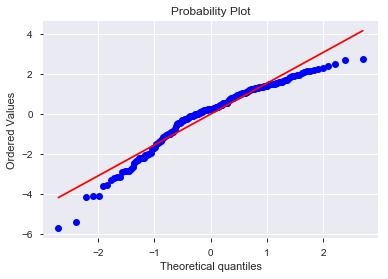

In [31]:
#Q-Q Plot
from scipy import stats 
import pylab
stats.probplot(lm.resid,dist='norm',plot=pylab)
pylab.show()

In [32]:
#Check for multicollinearity -VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [33]:
y,X=dmatrices('Sales~TV+Radio',advt,return_type='dataframe')

In [34]:
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns

In [35]:
vif

,VIF Factor,features
0,6.135476,Intercept
1,1.003013,TV
2,1.003013,Radio


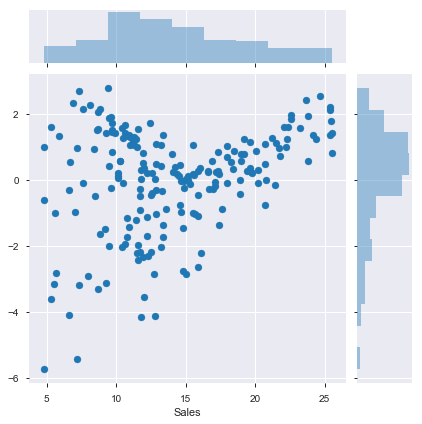

In [36]:
sns.jointplot(advt.Sales,lm.resid)

In [37]:
# Getting the f value
lm.f_pvalue

1.8192876875949893e-101

In [38]:
## Getting model parameters
lm.params

Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

In [39]:
# Parameters at 95% confidence intervals
lm.conf_int()

,0,1
Intercept,2.487161,3.587166
TV,0.042489,0.047683
Radio,0.172771,0.202802


In [40]:
# Verifying parameter significance
lm.pvalues

Intercept    6.369904e-22
TV           6.960144e-85
Radio        3.849279e-62
dtype: float64

In [41]:
lm.rsquared

0.9051018203011454

In [42]:
lmpredict = lm.predict( {'TV': advt.TV ,'Radio':advt.Radio} )
lmpredict[0:10]

0    20.509818
1    12.423503
2    12.432040
3    17.623297
4    13.216837
5    12.612167
6    11.789012
7    12.137135
8     3.819256
9    12.533627
dtype: float64

In [43]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )
mse

2.4974594216362

In [44]:
rmse = np.sqrt( mse )
rmse

1.5803352244496103

In [45]:
lm.resid[1:10]

1   -2.023503
2   -3.132040
3    0.876703
4   -0.316837
5   -5.412167
6    0.010988
7    1.062865
8    0.980744
9   -1.933627
dtype: float64

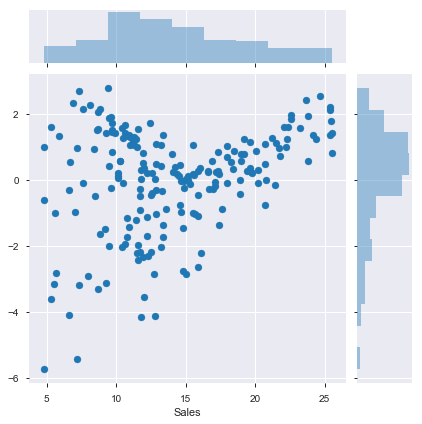

In [46]:
sns.jointplot(  advt.Sales, lm.resid )b

In [ ]:
#the residuals are normally distributed i.e. they are random.
#The residuals plotted against the response variable does not show any pattern

#### Parameters estimated are considered to be significant if p-value is less than 0.05. This indicates intercept ,TV and Radio are significant parameters.
#### So, the linear model is Sales=3.037164+ 0.045086∗TV+ 0.187786∗Radio

## Using sklearn Library to build the model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
  advt[["TV", "Radio", "Newspaper"]],
  advt.Sales,
  test_size=0.3,
  random_state = 42 )

In [50]:
print(len( X_train))
print(len( X_test))

140
60


In [51]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [52]:
linreg.coef_

array([0.0430393 , 0.20033812, 0.00417882])

In [53]:
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

1.9555014830178585

In [54]:
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

1.4344122789633453

In [55]:
metrics.r2_score( y_train, y_pred_t )

0.9181096723941515

In [56]:
metrics.r2_score( y_test, y_pred )

0.8599508916809204

In [57]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.043039300349941585),
 ('Radio', 0.20033812183662097),
 ('Newspaper', 0.0041788227946051165)]

In [58]:
residuals = y_test - y_pred
residuals[0:10]

95     0.375428
15     1.268423
30    -0.000815
158   -3.729429
128    2.443992
115   -0.808819
69     1.116062
170    0.902713
174   -1.752342
45    -0.219932
Name: Sales, dtype: float64

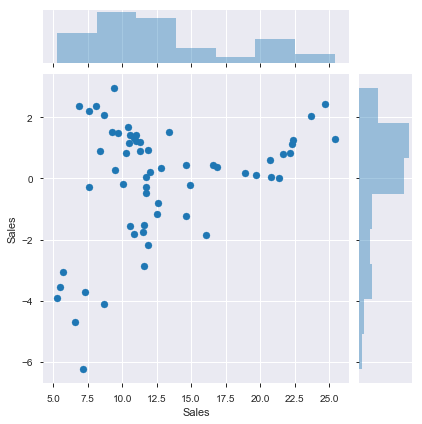

In [61]:
sns.jointplot( y_test,residuals)

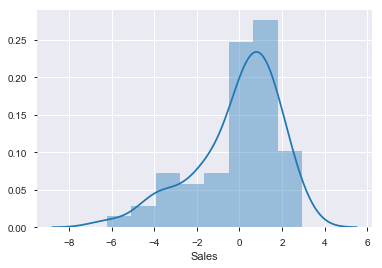

In [62]:
sns.distplot( residuals )

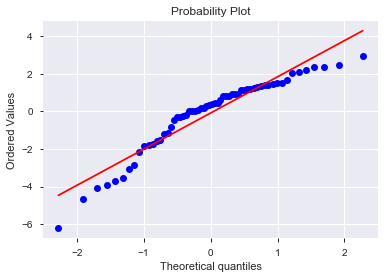

In [63]:
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [ ]:
#The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [64]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [65]:
linreg = LinearRegression()

In [66]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

array([0.81281544, 0.86934902, 0.95082325, 0.92403931, 0.94066325,
       0.91266428, 0.85995506, 0.95645737, 0.76575913, 0.90226452])

In [67]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.89

In [68]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [69]:
F_values, p_values  = f_regression(  X_train, y_train )
F_values

array([185.0114304 ,  93.76524204,   8.44029735])

In [70]:
['%.3f' % p for p in p_values]

['0.000', '0.000', '0.004']

In [ ]:
#As p - values are less than 5% - the variables are siginificant in the regression equation.

In [71]:
### Exporting and importing the model
import pickle

In [72]:
from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)

['lin_model.pkl']

In [73]:
model_clone = joblib.load('lin_model.pkl')

In [74]:
model_clone

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)